### Tratamiento de datos


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import datetime
from scipy.stats.distributions import *
import warnings

sns.set_style("whitegrid")

In [2]:
''' Se cargan los datos '''
df = pd.read_csv('AirQualityUCI.csv', sep=';')
df.drop(columns=['Unnamed: 15','Unnamed: 16'], inplace=True)
df.dropna(inplace=True)

''' Se cambia al formato deseado '''
cols = [col  for col in df.columns if df[col].dtype == 'O' and col != 'Time']
df['Time'] = df['Time'].str.replace('.',':')
df[cols] = df[cols].replace(',','.',regex = True)
df[df.columns[2:]] = df[df.columns[2:]].astype(float)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_timedelta(df['Time'], errors = 'ignore')

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Date           9357 non-null   datetime64[ns] 
 1   Time           9357 non-null   timedelta64[ns]
 2   CO(GT)         9357 non-null   float64        
 3   PT08.S1(CO)    9357 non-null   float64        
 4   NMHC(GT)       9357 non-null   float64        
 5   C6H6(GT)       9357 non-null   float64        
 6   PT08.S2(NMHC)  9357 non-null   float64        
 7   NOx(GT)        9357 non-null   float64        
 8   PT08.S3(NOx)   9357 non-null   float64        
 9   NO2(GT)        9357 non-null   float64        
 10  PT08.S4(NO2)   9357 non-null   float64        
 11  PT08.S5(O3)    9357 non-null   float64        
 12  T              9357 non-null   float64        
 13  RH             9357 non-null   float64        
 14  AH             9357 non-null   float64        
dtypes: d

In [4]:
def vector_time(date_arr,time_arr):
    hora = time_arr.components.hours
    año = date_arr.year
    mes = date_arr.month
    dia = date_arr.day
    return datetime.datetime(año,mes,dia,hora)

In [5]:
new_time = []

for i in range(9357):
    new_time.append(vector_time(df['Date'][i],df['Time'][i]))

In [6]:
cols = df.columns[2:]
cols

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [7]:
dictionary = {'date-time': new_time}

for col in cols:
    dictionary[col] = df[col]

In [8]:
df2 = pd.DataFrame(dictionary)
df2.head()

,date-time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### Objetivos.
*****************
El objetivo de este análisis es generar una regresión para una serie de tiempo que pueda determinar con la suficiente presición, los valores futuros en la serie para una intervalo de tiempo lo más lejano posible. Es decir, una función $f$ que, dado parémtros anteriores, pueda generar estimaciones de parámetros futuros: para $k\in \mathbb{N}$ fijo,

$$
\begin{equation}
    f(x_0,\cdots,x_{n}) = (\tilde{x}_{n+1},\cdots,\tilde{x}_{n+k}),\\
    \\
\end{equation}
$$
donde $\tilde{x}_i$ es la estimación de $x_i$.

### Problema 1: _Missing values_
******************************************
El primer problema que se puede observar en la base de datos es que existen valores atípicos, en este caso representados por el valor numérico -200, que se aleja de la naturaleza de nuestros datos (concentración de gases siempre es ``no-negativa``).

In [9]:
dia_0 = df2['date-time'][0]
index_dia0 = []

for i in range(9357):
    fecha = df2['date-time'][i]
    if fecha.year == dia_0.year:
        if fecha.month == dia_0.month:
            index_dia0.append(i)

Text(0, 0.5, 'Valor de la concentración.')

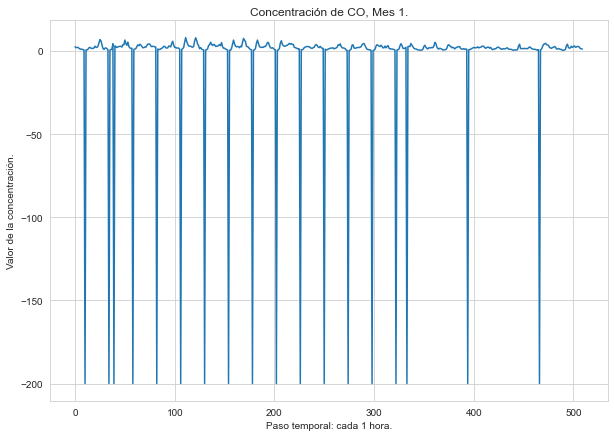

In [10]:
df_dia0 = df2.iloc[index_dia0]

plt.figure(figsize=(10,7))
plt.plot(df_dia0['CO(GT)'])
plt.title('Concentración de CO, Mes 1.')
plt.xlabel('Paso temporal: cada 1 hora.')
plt.ylabel('Valor de la concentración.')


La imagen anterior muestra que, con recurrencia, aparecen valores atípicos en la concentración de CO, tan sólo del primer mes de la base de datos.

La _imputación de Outliers_ es el método estándar para "rellenar" los datos faltantes. Esto evita tener que eliminar cada vector representante de cada dato y, de esta forma, aumentar en número de observaciones. En este caso particular, la imputacióin de estos valores es de vital importancia para tener una visión clara de la existencia o no de una tendencia temporal en los datos.

Algunos de los métodos de _Imputing_ son: reemplazar por la media de los datos, reemplazar mediante una estimación vía regresión lineal, regresión estocástica, árboles de regresión, etc. Los métodos nombrados anteriormente agregan de manera implícita hipótesis como distribución única para los datos o dependencia lineal. Pero en ningún caso incluye la dependencia temporal, esto hace que la estimación no posea una fuerte dependencia del punto anterior.

Por esta razón, generaremos un sistema propio para la estimación de los datos faltantes. Para esto asumiremos que cada concentración de gas posee una probabilidad _a priori_ definida para la hora en que se realizó la observación. A la densidad definida para esta probabilidad la denotaremos por $\pi_{h,G}(x_i)$, esto es, la densidad del gas $G$ en la hora $h$ evaluada en la observación $x_i$.

#### Paso 1: dependencia temporal.

Asumiremos que cada concentración de gas posee el mismo tipo de distribución a priori en cada hora, pero con diferente parámetro.

In [11]:
N,M = np.shape(df2)

Y = []
M = []
D = []
H = []

for i in range(N):
    Y.append(df2['date-time'][i].year)
    M.append(df2['date-time'][i].month)
    D.append(df2['date-time'][i].day)
    H.append(df2['date-time'][i].hour)

df2.columns[1:]

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [12]:
df3 = {
    'AÑO':Y,
    'MES':M,
    'DIA':D,
    'HORA':H
}

for cols in df2.columns[1:]:
    df3[cols] = df2[cols]

df3 = pd.DataFrame(df3)
df3.head()

,AÑO,MES,DIA,HORA,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004,3,10,18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004,3,10,19,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004,3,10,20,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004,3,10,21,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004,3,10,22,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


##### Medias

In [13]:
#Genero dataset con las medias por horas (sin outliers)
per_H = {} 
hrs =  [i for i in range(24)]
per_H['HORAS'] = hrs

for col in df3.columns[4:]:
    medias_col = []
    for i in hrs:
        medias_col.append(np.mean(df3[col][(df3['HORA']==i) & (df3[col]>0)]))
    
    per_H[col] = medias_col

df_medias = pd.DataFrame(per_H)

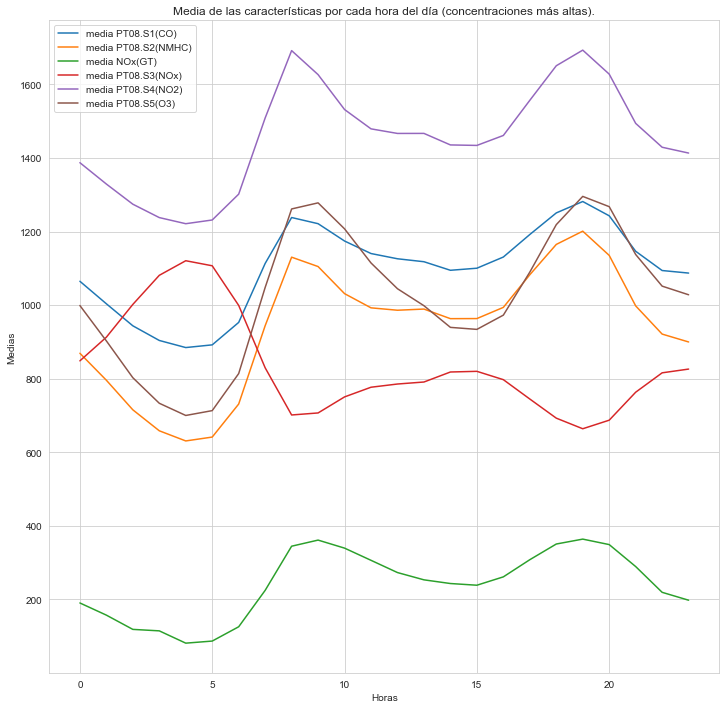

In [14]:
plt.figure(figsize=(12,12))
for col in df_medias.columns[1:]:
    if df_medias[col][0]>120:
        plt.plot(df_medias['HORAS'],df_medias[col], label = 'media '+col)
plt.xlabel('Horas')
plt.ylabel('Medias')
plt.title('Media de las características por cada hora del día (concentraciones más altas).')
plt.legend()
plt.show()

Notamos que, de manera generalque las curvas suelen comportarse de manera parecida pero a distintas alturas en el gráfico, concentrando dos valores máximos al rededor de las 08:00 y las 19:00 hrs.

Para las concentraciones más bajas no es posible notar una tendencia en el mismo gráfico, por lo tanto se ha decidido graficar por separado.

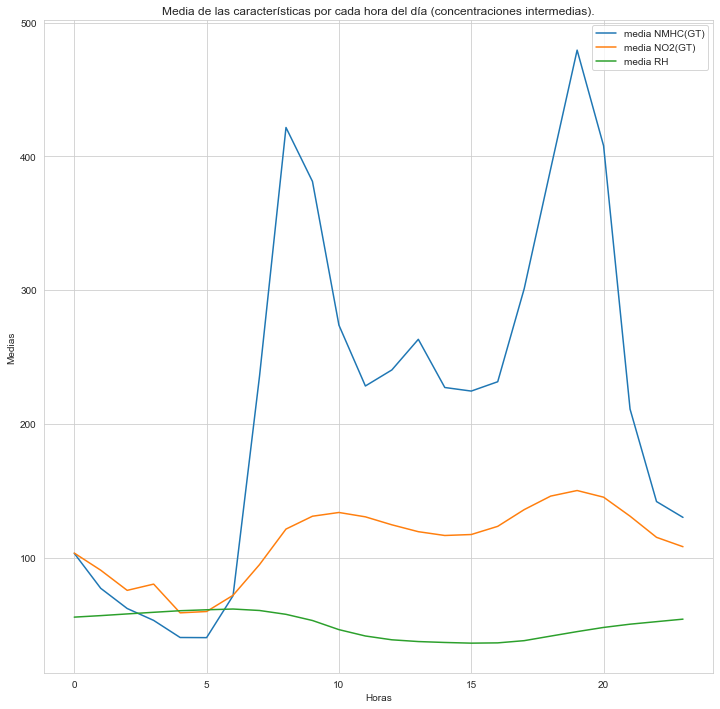

In [15]:
plt.figure(figsize=(12,12))
for col in df_medias.columns[1:]:
    if df_medias[col][0]<=120:
        if df_medias[col][0]>50:
            plt.plot(df_medias['HORAS'],df_medias[col], label = 'media '+col)
plt.xlabel('Horas')
plt.ylabel('Medias')
plt.title('Media de las características por cada hora del día (concentraciones intermedias).')
plt.legend()
plt.show()

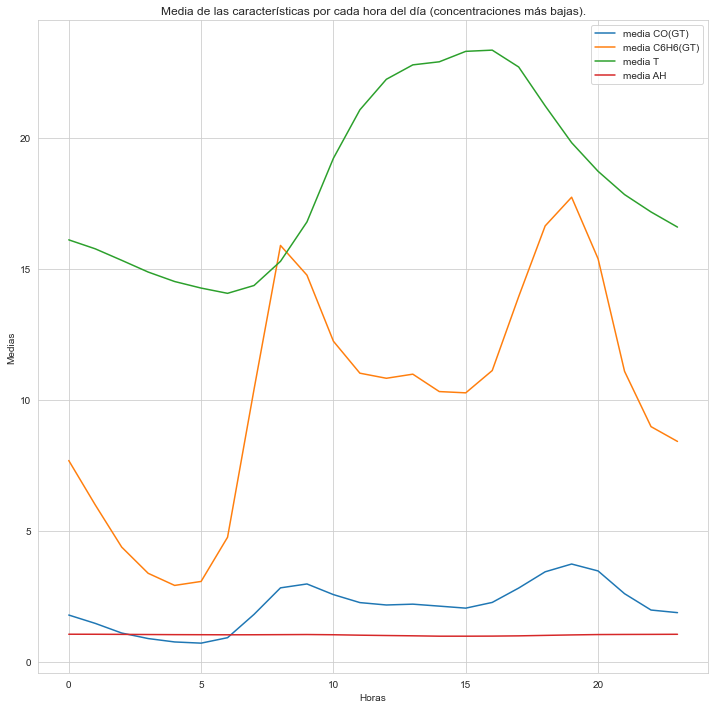

In [16]:
plt.figure(figsize=(12,12))
for col in df_medias.columns[1:]:
    if df_medias[col][0]<=50:
        plt.plot(df_medias['HORAS'],df_medias[col], label = 'media '+col)
plt.xlabel('Horas')
plt.ylabel('Medias')
plt.title('Media de las características por cada hora del día (concentraciones más bajas).')
plt.legend()
plt.show()

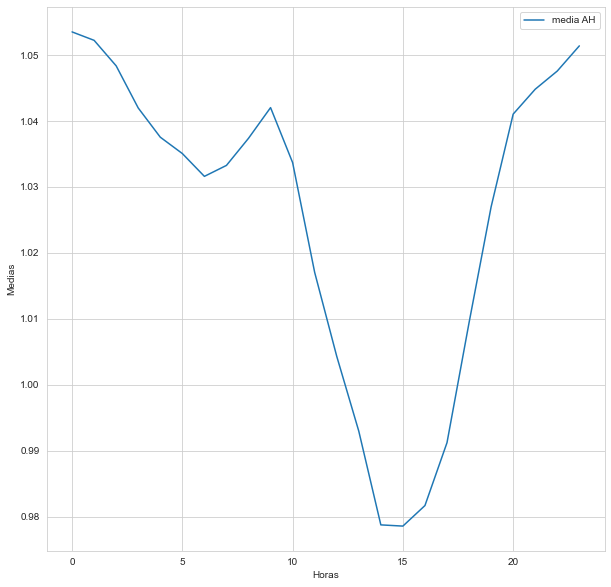

In [17]:
plt.figure(figsize=(10,10))
plt.plot(df_medias['HORAS'],df_medias[df_medias.columns[-1]], label = 'media '+col)
plt.xlabel('Horas')
plt.ylabel('Medias')
plt.legend()
plt.show()

Rigurosamente habríamos optado por un test como ANOVA para asegurar la diferencias de las medias de cada concentración en las horas del día, pero dada las diferencias vistas en los gráficos omitiremos esa parte.

Partamos describiendo la distribución _a priori_ de las concentraciones:

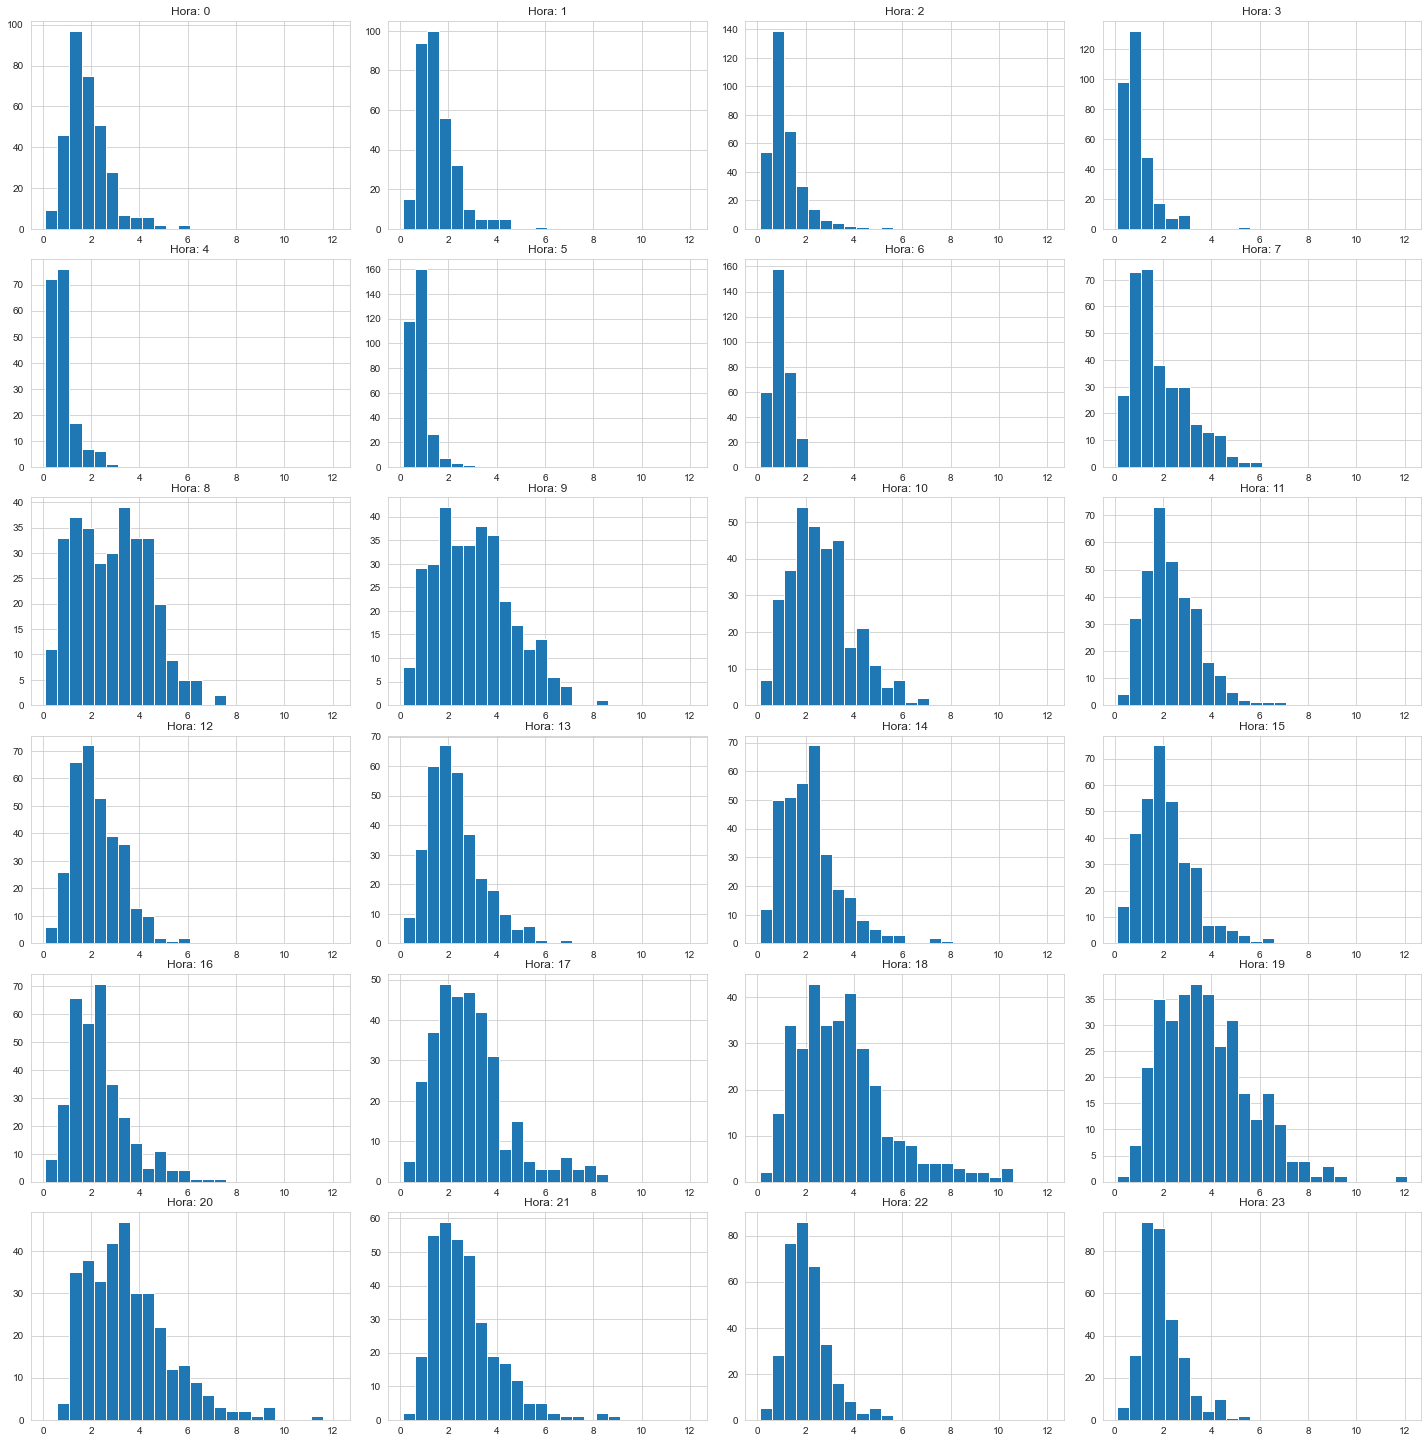

In [18]:
# Ajuste a priori para CO(GT)

CO_clean = df3['CO(GT)'][df3['CO(GT)']>0]
M_CO = np.max(CO_clean)
m_CO = np.min(CO_clean)
bin_s = 0.5

fig, axis = plt.subplots(6,4 , figsize=(20,20))
fig.tight_layout()
for i in range(6):
    for j in range(4):
        axis[i,j].hist(CO_clean[ df3['HORA']== j + 4*i], bins = np.arange(m_CO, M_CO+bin_s, bin_s))
        axis[i,j].set_title('Hora: '+str(j + 4*i))

Notamos que los datos poseen una naturaleza positiva y, sin hipótesis previas, son no acotados, por lo tanto buscaremos distribuciones de variables aleatorias definidas en $\mathbb{R}_{+}$. Algunas de las opciones de distribuciones son:
- Distribución $\chi^2$.
- Distribución exponencal.
- Distribución $\beta'$
- Distribución Weibull

La siguiente clase intentará resumirnos el nivel de ajuste de cada una de estas distribuciones.

In [62]:
class fit_prob():
    warnings.filterwarnings("ignore")
    def __init__(self, df, col):
        self.data = df[col][df[col]>=0]
        self.__per_hora = {}
        for i in range(24):
            vector = self.data[df['HORA']==i]
            paso = (np.max(vector)-np.min(vector))/len(vector)
            bins = np.arange(np.min(vector),np.max(vector),paso)
            
            self.__per_hora['Hora '+str(i)] = {'Muestra':vector,
                                             'bins':bins,
                                             'paso':paso}
            
        self.__names = [('Chi-2',chi2),
                        ('Exp-Weibull',exponweib),
                        ('Beta-Prime',betaprime),
                        ('Log-normal',lognorm),
                        ('Gamma',gamma)]
    def reporte(self):
        self.__dist = {}
        for nombre, distribucion in self.__names:
            EMC = []
            AIC = []
            BIC = []
            for i in range(24):
                pred = distribucion.fit(self.__per_hora['Hora ' + str(i)]['Muestra'])
                arg = pred[:-2]
                loc = pred[-2]
                scale = pred[-1]
                
                y = distribucion.pdf(self.__per_hora['Hora ' + str(i)]['bins'],loc=loc,scale=scale,*arg)
                
                #cálculo de EMC
                emc = np.mean(np.power(self.__per_hora['Hora ' + str(i)]['Muestra'] -y,2))
                EMC.append(emc)
                
                #cálculo de info Akaike
                logLike = np.sum(distribucion.logpdf(self.__per_hora['Hora ' + str(i)]['bins'],loc=loc,scale=scale,*arg))
                aic = 2*len(arg) - 2*logLike
                AIC.append(aic)
                
                #BIC
                bic = np.log(len(self.__per_hora['Hora ' + str(i)]['Muestra']))*len(arg) - 2*logLike
                BIC.append(bic)
                
            self.__dist[nombre] = [np.mean(EMC),np.mean(AIC),np.mean(BIC)]
        
        
        features = ['EMC', 'AIC', 'BIC']
        row_format ='{:>15}'*4
        row_num = '{:>15}' + '{:>15.2f}'*3
        print(row_format.format("",*features))
        for modelo,fila in zip(list(self.__dist.keys()),list(self.__dist.values())):
            print(row_num.format(modelo,*fila))

    def parametros(self,modelo):
        for nombre,dist in self.__names:
            if nombre == modelo:
                prob = dist
        dic = {}
        for i in range(24):
            dic['Hora '+str(i)] = prob.fit(self.__per_hora['Hora ' + str(i)]['Muestra'])
        
        return dic
        

In [63]:
print('Reporte concentración CO(GT)'+':\n')
rep = fit_prob(df3,'CO(GT)')
rep.reporte()

Reporte concentración CO(GT):

                           EMC            AIC            BIC
          Chi-2           6.10        1759.65        1763.41
    Exp-Weibull           6.08        1762.67        1770.19
     Beta-Prime           6.08        1762.00        1769.53
     Log-normal           6.08        1767.61        1771.37
          Gamma           6.08        1811.22        1814.98


Con estos valores, podemos notar que la distribución que minimiza todos los criterios es la distribución ```Beta-Prime```. Podemos recuperar los parámetros para las distribuciones de cada hora de la siguiente forma:

In [68]:
d = rep.parametros('Beta-Prime')

for k in d.keys():
    print(k+': ',d[k],'\n')

Hora 0:  (29.069703990353656, 17.264535102241936, -0.9259823793977099, 1.5164912184613009) 

Hora 1:  (29.16226310024652, 9.964399785634097, -0.44930989107638286, 0.5882481510094393) 

Hora 2:  (22.170609797915937, 6.514193283106942, -0.22395472282087675, 0.3284508490382119) 

Hora 3:  (22.533861020479314, 5.294256563496278, -0.13312348364078602, 0.19442516167619356) 

Hora 4:  (30.05631866857172, 5.287533896696914, -0.09134546896634754, 0.12115245599563823) 

Hora 5:  (28.65437050478444, 10.579078190436793, -0.20838219332937047, 0.30694457118652285) 

Hora 6:  (9.55898053004114, 44.20118856005996, -0.26600543342354066, 5.360538335113649) 

Hora 7:  (2.2199839115548228, 298653.5946606471, 0.06529282006505982, 234540.83987335372) 

Hora 8:  (9.565920072482747, 715441.8124810279, -1.893165245380052, 352569.94304462) 

Hora 9:  (6.157221982214459, 3482842.4368257737, -0.9540199554932076, 2219487.941628945) 

Hora 10:  (5.647108737069228, 670.8475186411183, -0.46324640906041736, 357.951332

Ahora podemos observar gráficamente cómo es el ajuste de la densidad encontrada con los datos reales:

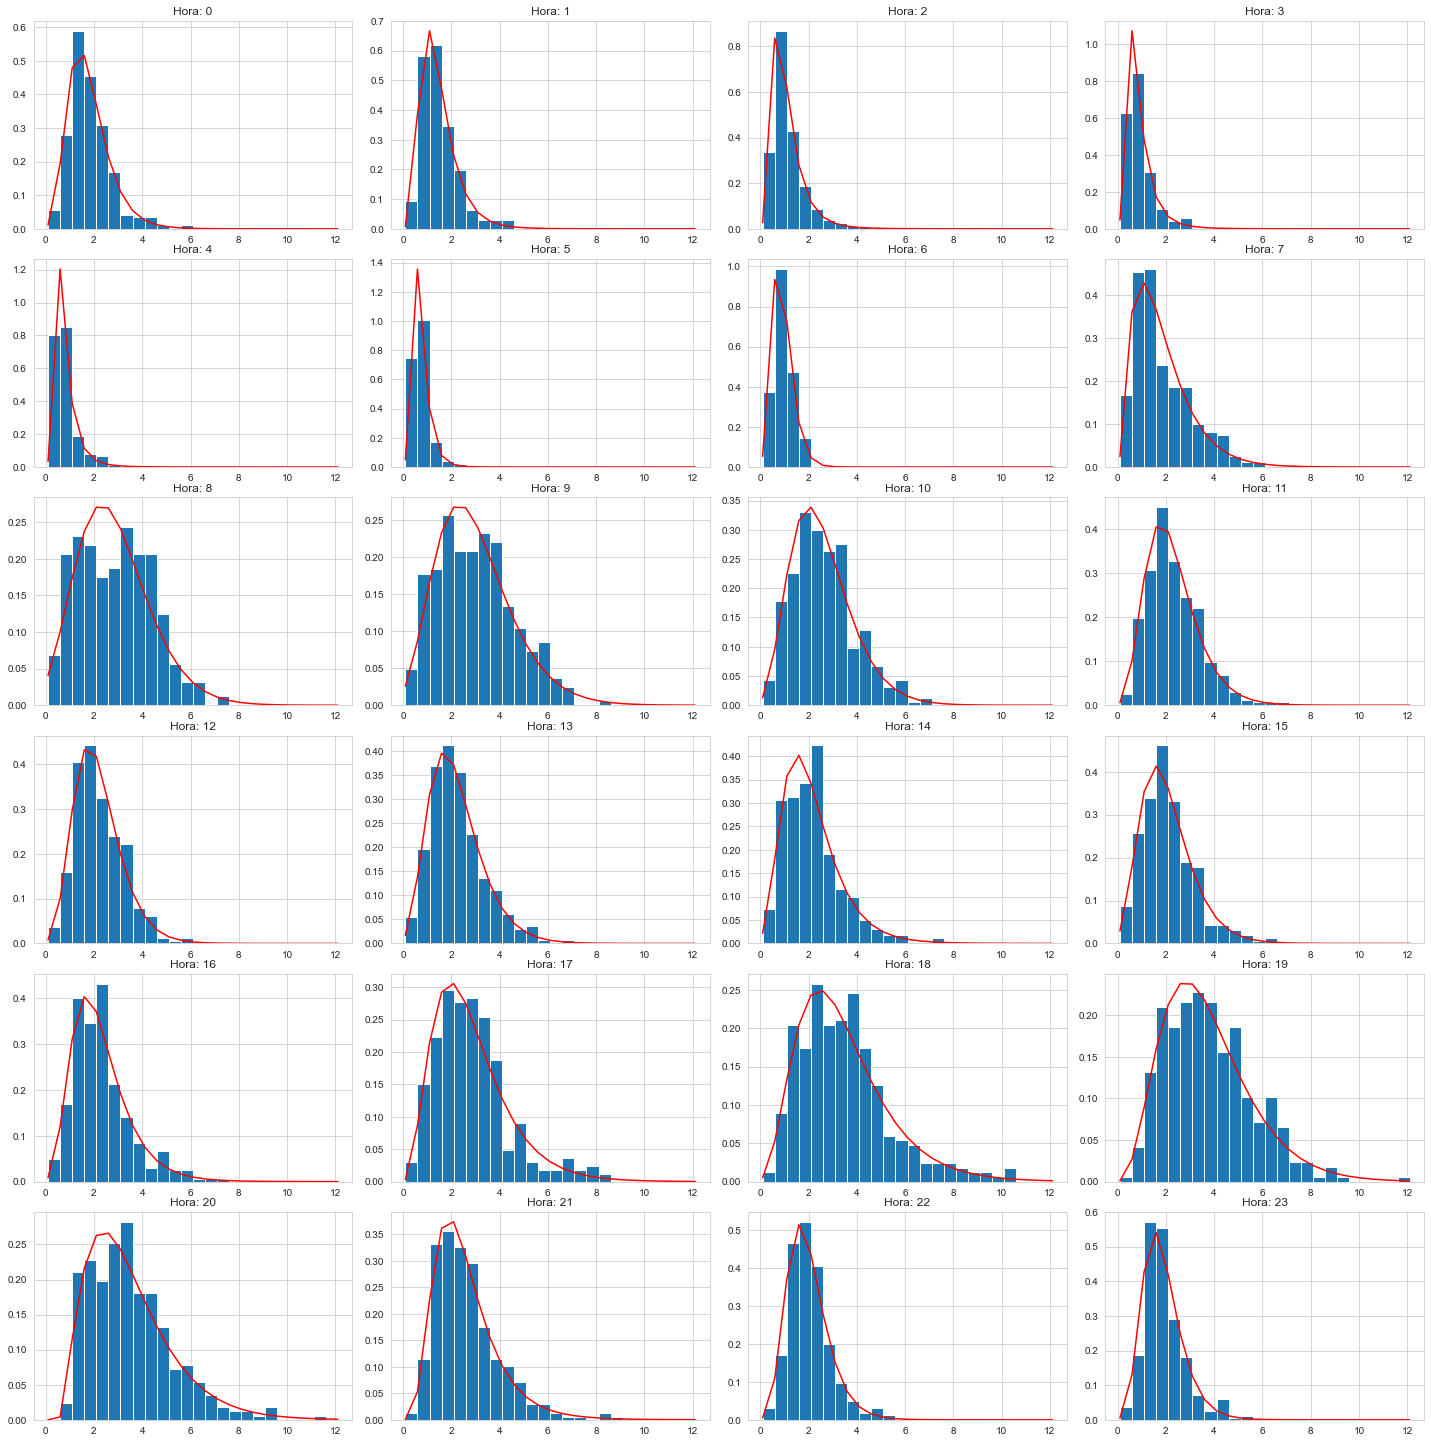

In [72]:
CO_clean = df3['CO(GT)'][df3['CO(GT)']>0]
M_CO = np.max(CO_clean)
m_CO = np.min(CO_clean)
bin_s = np.arange(m_CO, M_CO+0.5, 0.5)

fig, axis = plt.subplots(6,4 , figsize=(20,20))
fig.tight_layout()
for i in range(6):
    for j in range(4):
        axis[i,j].hist(CO_clean[ df3['HORA']== j + 4*i], bins = bin_s, density = True)
        axis[i,j].plot(bin_s,betaprime.pdf(bin_s,loc=d['Hora '+str(j + 4*i)][-2],scale=d['Hora '+str(j + 4*i)][-1],*d['Hora '+str(j + 4*i)][:-2]),color='r')
        axis[i,j].set_title('Hora: '+str(j + 4*i))